In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
works = pd.read_csv("works.csv")
works

,salary,educationType,jobTitle,qualification,gender,dateModify,skills,otherInfo
0,60000,Высшее,Специалист пресс-службы,Магистр,Мужской,2021-04-01,"<p>Аналитическое&nbsp;мышление,&nbsp;<span cla...",NaN
1,85000,Высшее,менеджер проектов,NaN,Мужской,2021-04-01,NaN,NaN
2,15000,Среднее профессиональное,....,NaN,Женский,2021-06-01,NaN,NaN
3,30000,NaN,NaN,NaN,Женский,2021-04-03,NaN,NaN
4,45000,NaN,NaN,NaN,Мужской,2021-06-28,NaN,NaN
...,...,...,...,...,...,...,...,...
32678,15000,NaN,NaN,NaN,Женский,2021-06-23,NaN,NaN
32679,13000,Среднее,уборщица,NaN,Женский,2021-07-29,NaN,NaN
32680,16000,Среднее профессиональное,кочегар машинист котельной,NaN,Мужской,2021-11-11,NaN,NaN
32681,35000,Высшее,NaN,NaN,Мужской,2020-04-21,NaN,NaN


### 1.Узнать общее количество записей в датасете

In [3]:
works.shape

(32683, 8)

In [4]:
works['salary'].count()

32683

In [5]:
len(works.index)

32683

### 2.Узнать количество мужчин и женщин в датасете

In [6]:
works[works['gender'] == 'Мужской'].shape[0]



13386

In [7]:
(works['gender'] == 'Женский').values.sum()


17910

In [8]:
works['gender'].value_counts()

Женский    17910
Мужской    13386
Name: gender, dtype: int64

### 3.Узнать сколько значений в столбце skills не NAN

In [9]:
works['skills'].notnull().values.sum()

8972

In [10]:
works['skills'].notna().values.sum()

8972

In [11]:
works['skills'].dropna().shape[0]

8972

### 4.Получить все заполненные скиллы

In [12]:
works['skills'].dropna()

0        <p>Аналитическое&nbsp;мышление,&nbsp;<span cla...
5        Ответственная,пунктуальная,дисциплинированная ...
10                         <p>Коммуникабельность&nbsp;</p>
13                         <p>Ответственность в работе</p>
21       <p>Усидчивость, умение удерживать в памяти нуж...
                               ...                        
32665    <p>Отвественность</p><p>Исполнительность</p><p...
32668    <p>Высокая работоспособность, нацеленность на ...
32672                                <p>исполнительный</p>
32674    <p>Нацелен на результат. Считаю себя командным...
32675                                 <p>трудоспособен</p>
Name: skills, Length: 8972, dtype: object

### 5.Вывести зарплату только у тех, у которых в скиллах есть Python (Питон)

In [13]:
df = works.skills.dropna().str.lower().str.contains('python|питон')
works[works.skills.notna()][df]['salary']

230      35000
334      20000
2394     35000
8096     15000
9014     25000
9667     90000
20930    30000
22530    50000
28286    23000
30430    23000
Name: salary, dtype: int64

### 6.Построить перцентили по заработной плате у мужчин и женщин

In [14]:
percentiles = np.linspace(.1, 1, 10)
percentiles

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [15]:
men_salary = works.query('gender == "Мужской"').quantile(percentiles)
men_salary

,salary
0.1,15000.0
0.2,20000.0
0.3,25000.0
0.4,30000.0
0.5,30000.0
0.6,35000.0
0.7,40000.0
0.8,50000.0
0.9,60000.0
1.0,1000000.0


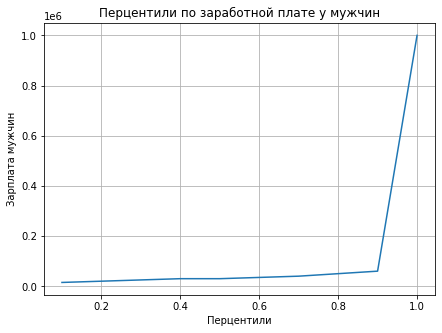

In [16]:
plt.figure(figsize=(7, 5)) 
plt.title('Перцентили по заработной плате у мужчин') 
plt.xlabel('Перцентили') 
plt.ylabel('Зарплата мужчин') 
plt.grid() 

plt.plot(men_salary)  
plt.show()

In [17]:
women_salary = works.query('gender == "Женский"').quantile(percentiles)
women_salary

,salary
0.1,15000.0
0.2,18000.0
0.3,20000.0
0.4,22000.0
0.5,25000.0
0.6,30000.0
0.7,30000.0
0.8,35000.0
0.9,47000.0
1.0,900000.0


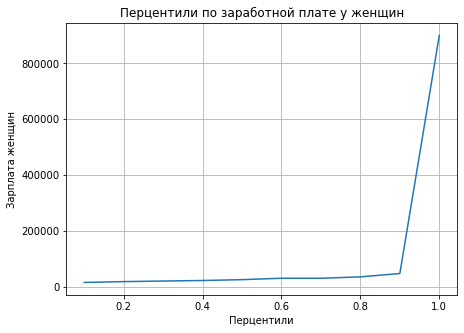

In [18]:
plt.figure(figsize=(7, 5)) 
plt.title('Перцентили по заработной плате у женщин') 
plt.xlabel('Перцентили') 
plt.ylabel('Зарплата женщин') 
plt.grid() 

plt.plot(women_salary)  
plt.show()

### 7.Построить графики распределения по заработной плате мужчин и женщин в зависимости от высшего образования

In [19]:
men_salary = works.groupby('educationType').agg('mean').reset_index()


In [20]:
men_salary = works.query('gender == "Мужской"').groupby('educationType').agg('mean').reset_index()


In [21]:
women_salary = works.query('gender == "Женский"').groupby('educationType').agg('mean').reset_index()


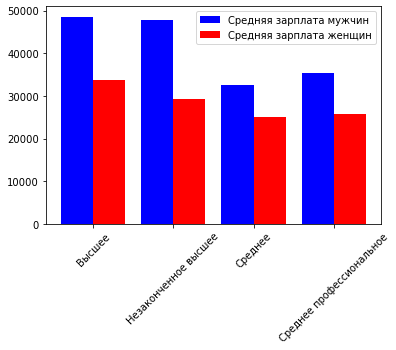

In [22]:
educationTypes = men_salary['educationType'].values
men_salaries = men_salary['salary'].values
women_salaries = women_salary['salary'].values

index = np.arange(len(educationTypes))

bw = 0.4
plt.bar(index-bw/2, men_salaries, bw, color='b', label='Средняя зарплата мужчин')
plt.bar(index+bw/2, women_salaries, bw, color='r', label='Средняя зарплата женщин')
plt.xticks(index, educationTypes, rotation=45)
plt.legend()
plt.show()

##### Графики для мужчин

In [23]:
men_height = works.query('gender == "Мужской" and educationType == "Высшее"')


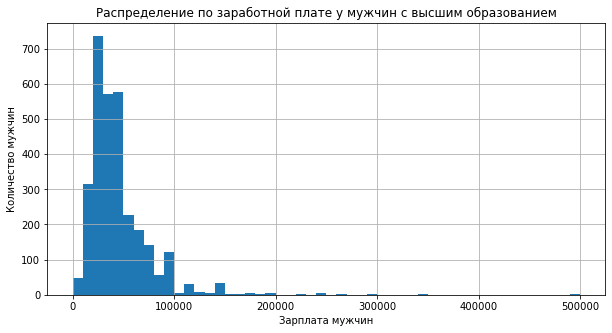

In [25]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение по заработной плате у мужчин с высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(men_height['salary'], 
         bins=50) 
plt.show()


In [26]:
men_not_height = works.query('gender == "Мужской" and educationType == "Незаконченное высшее"')


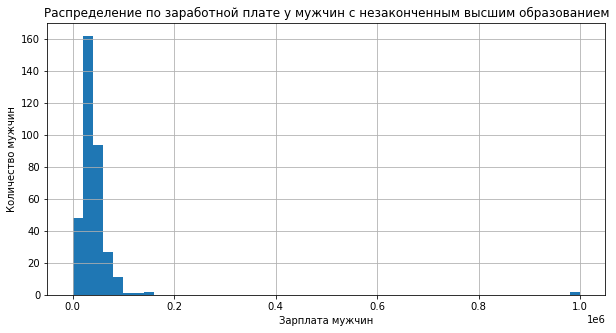

In [27]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин с незаконченным высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(men_not_height['salary'], 
         bins=50) 
plt.show()

In [28]:
men_mean = works.query('gender == "Мужской" and educationType == "Среднее"')

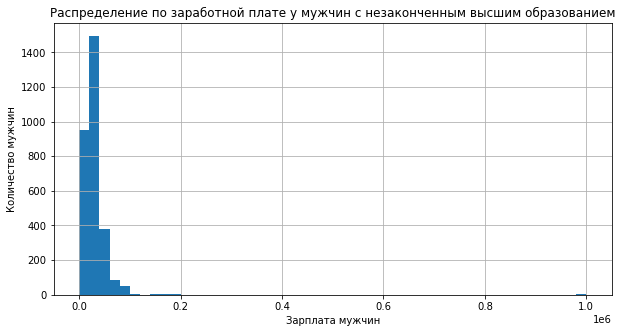

In [29]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин с незаконченным высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(men_mean['salary'], 
         bins=50) 
plt.show()

In [30]:
men_mean_prof = works.query('gender == "Мужской" and educationType == "Среднее профессиональное"')

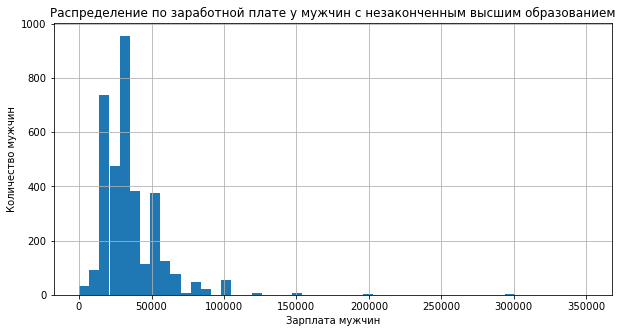

In [31]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у мужчин с незаконченным высшим образованием') 
plt.xlabel('Зарплата мужчин') 
plt.ylabel('Количество мужчин') 
plt.grid() 

plt.hist(men_mean_prof['salary'], 
         bins=50) 
plt.show()

##### Графики для женщин

In [32]:
women_height = works.query('gender == "Женский" and educationType == "Высшее"')

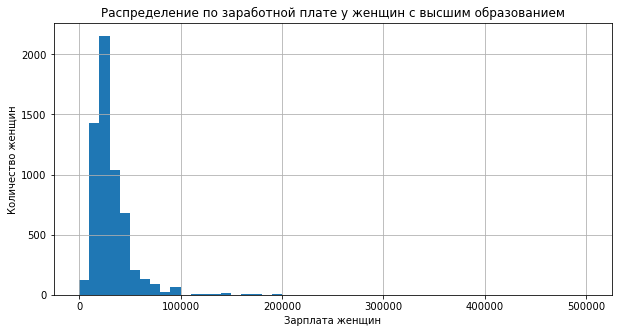

In [33]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(women_height['salary'], 
         bins=50) 
plt.show()


In [34]:
women_not_height = works.query('gender == "Женский" and educationType == "Незаконченное высшее"')

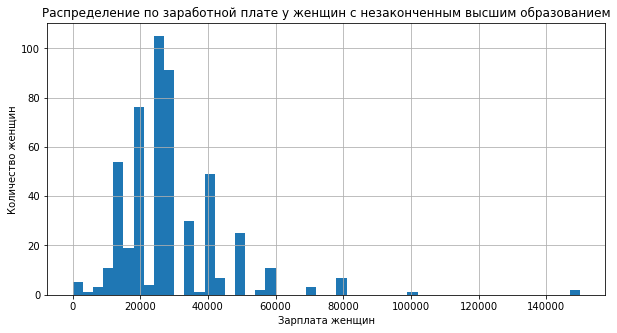

In [35]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с незаконченным высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(women_not_height['salary'], 
         bins=50) 
plt.show()

In [36]:
women_mean = works.query('gender == "Женский" and educationType == "Среднее"')

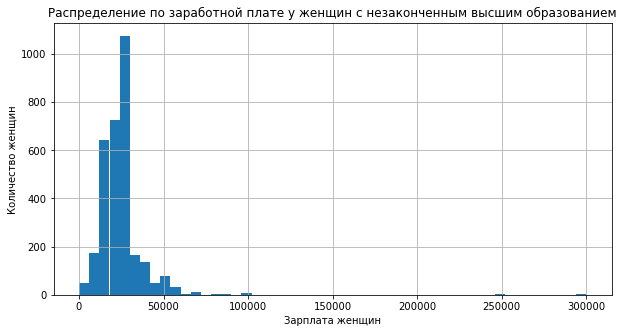

In [37]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с незаконченным высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(women_mean['salary'], 
         bins=50) 
plt.show()

In [38]:
women_mean_prof = works.query('gender == "Женский" and educationType == "Среднее профессиональное"')

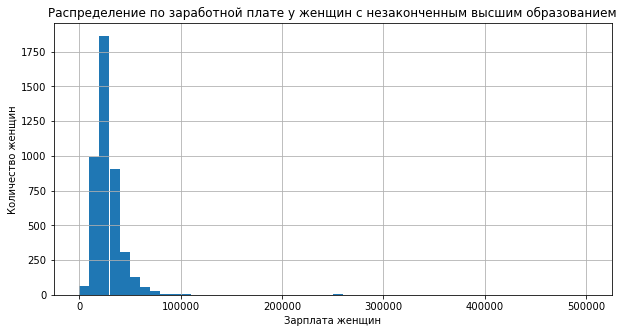

In [39]:
plt.figure(figsize=(10, 5))  
plt.title('Распределение по заработной плате у женщин с незаконченным высшим образованием') 
plt.xlabel('Зарплата женщин') 
plt.ylabel('Количество женщин') 
plt.grid() 

plt.hist(women_mean_prof['salary'], 
         bins=50) 
plt.show()